# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Import the Data

In [2]:
df=pd.read_csv('diamondss.csv')
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


# 2.Handle Missing Values

In [3]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# 3.Data Visualization and Exploration

<Axes: xlabel='price', ylabel='Count'>

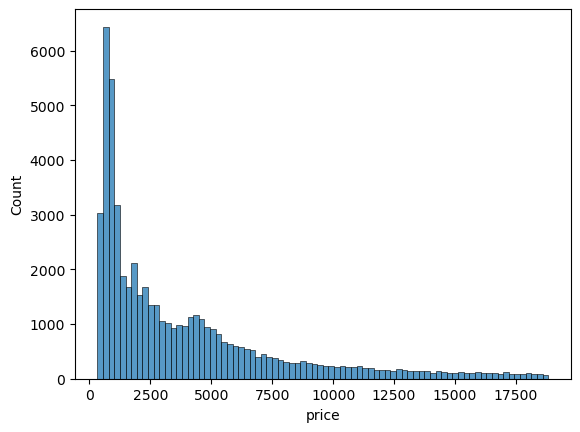

In [12]:
sns.histplot(df['price'])

<Axes: xlabel='cut', ylabel='count'>

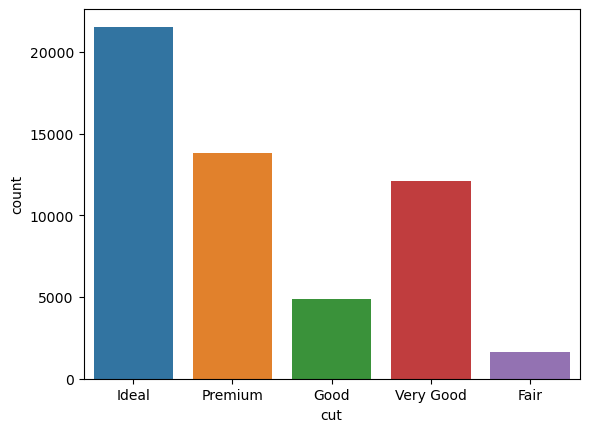

In [13]:
sns.countplot(x='cut', data=df)

In [23]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [8]:
df.duplicated().sum()

146

In [9]:
df.drop_duplicates()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# 4.Preprocess the Data

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['cut'] = le.fit_transform(df['cut'])
df['color'] = le.fit_transform(df['color'])
df['clarity'] = le.fit_transform(df['clarity'])


In [14]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31


In [15]:
X =df.drop(['price', 'carat'], axis=1)

In [17]:
X

,cut,color,clarity,depth,table,x,y,z
0,2,1,3,61.5,55.0,3.95,3.98,2.43
1,3,1,2,59.8,61.0,3.89,3.84,2.31
2,1,1,4,56.9,65.0,4.05,4.07,2.31
3,3,5,5,62.4,58.0,4.20,4.23,2.63
4,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,3,4,3,61.0,58.0,6.15,6.12,3.74


In [19]:
y1 = df['price']
y2 = df['carat']

# 5.Split the data into training and testing

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y1_train.shape)
print(y1_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(43152, 8)
(10788, 8)
(43152,)
(10788,)
(43152,)
(10788,)


# Scale/Normalize Data

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6.Choose the Model

In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X_train,y1_train,y2_train)

RandomForestRegressor()

# Train model

In [28]:
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train_scaled, np.column_stack((y1_train, y2_train)))


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

# 7.Evaluate model

In [ ]:
y1_pred, y2_pred = model.predict(X_test_scaled)
mse1 = mean_squared_error(y1_test, y1_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
print(f'MSE (price): {mse1:.2f}')
print(f'MSE (carat): {mse2:.2f}')

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
y_pred = model.predict(X_test_scaled)
print('MAE:', mean_absolute_error(np.column_stack((y1_test, y2_test)), y_pred))
print('MSE:', mean_squared_error(np.column_stack((y1_test, y2_test)), y_pred))
print('R-squared:', r2_score(np.column_stack((y1_test, y2_test)), y_pred))

MAE: 138.55254664147841
MSE: 154543.68781662756
R-squared: 0.9898460433162224
